# Exo Matplotlib/Seaborn avec JO-dataset

0. __Pour chaque graphique, ajouter un titre qui contient les axes/colonnes utilisé pour le graphique__ 
    - __attention:__ pour chaque graphique, il faudra appiquer une transformation sur le data pour qu'il soit adapté à la construction des graphiques demandé <br><br>

  
1. __Faire un (line-)plot qui montre:__<br>
    - le nombre de sports uniques par année
    - placer des points comme marqueurs
    - changer le style de ligne en pointillé
<br><br>

2. __Faire un graphique composé qui montre:__<br>
    - le nombre de sports uniques par année (voir 1.)
    - avec une décomposition par genre homme-femme, indiqué dans une légende
    - changer les couleurs en 'cyan' et 'magenta'
    - appliquer un 'alpha' de '0.5'
    - changer la légende de position: en dessous de l'axe-x
<br><br>
    
    
3. __Faire un bar-plot qui montre:__<br>
    - le top 10 des noms 
    - qui ont participés à le plus de sports différents, 
    - trié par: nombre de sports différents, nombre de médailles
    - changer l'orientation des labels sur l'axe-x ('xticks')
    - changer le nom de l'axe-x: 'top 10' ('xlabel')
<br><br>

4. __Faire un pie-plot qui montre les info de 'Carl Schuhmann':__<br>

    - le nombre de médailles (confondues) pour chaque sport
    - avec le type de sport pour lequel cet athlète a le plus de medailles, mis en évidence
<br><br>

5. __Faire un histogramme qui montre:__<br>
    - l'age
    - par tranche d'age de 3 années
<br><br>

6. __Faire graphique composé d' histogrammes qui montre:__ <br>
    - la taille (height)
    - par tranche de 4 cm
    - decomposé par homme-femme
    - avec un alpha = 0.6

In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/Exercices_Pandas_athlete_events.csv')
data.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


  
1. __Faire un (line-)plot qui montre:__<br>
    - le nombre de sports uniques par année
    - placer des points comme marqueurs
    - changer le style de ligne en pointillé


In [3]:
GB1 = data[['Year','Sport']].groupby(['Year'], as_index=False).agg({'Sport':['nunique','count']})
display(GB1.head())

## ici, ceci est suffisant
GB1_ = data[['Year','Sport']].groupby(['Year'], as_index=False).nunique()

## aussi ok:
GB1__ = data[['Year','Sport']].drop_duplicates(subset=['Year','Sport']).groupby(['Year'], as_index=False).count()

print('-'*30)
display(GB1_.head(2))
display(GB1__.head(2))

Year   Sport      
        nunique count
0  1896       9   380
1  1900      20  1936
2  1904      18  1301
3  1906      13  1733
4  1908      24  3101

------------------------------


,Year,Sport
0,1896,9
1,1900,20


,Year,Sport
0,1896,9
1,1900,20


In [4]:
GB1.columns

MultiIndex([( 'Year',        ''),
            ('Sport', 'nunique'),
            ('Sport',   'count')],
           )

SELECT COUNT (DISTINCT Sport) as 'nunique', COUNT(Sport) as 'count', Year  
FROM data  
GROUP BY Year  
(ORDER BY Year)  


[ https://matplotlib.org/stable/api/markers_api.html ]

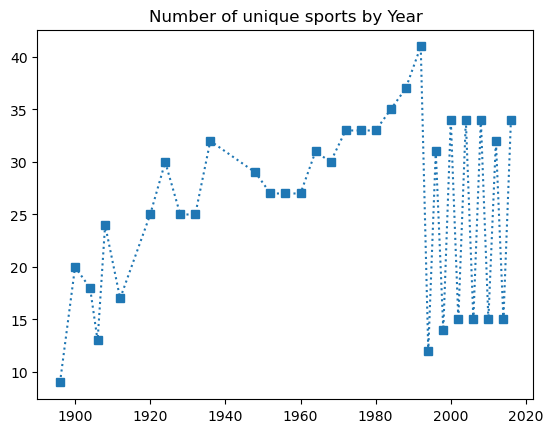

In [7]:
plt.title('Number of unique sports by Year')


# lineplot matplotlib
plt.plot(GB1_["Year"]
         ,GB1_['Sport'] 
         ,linestyle =':' # '-', '--'
         ,marker = 's' #'.'
        ) 

plt.show()


In [8]:
GB1.columns

MultiIndex([( 'Year',        ''),
            ('Sport', 'nunique'),
            ('Sport',   'count')],
           )

2. __Faire un graphique composé (superposé) qui montre:__<br>
    - le nombre de sports uniques par année (voir 1.)
    - avec une décomposition par genre homme-femme, indiqué dans une légende
    - changer les couleurs en 'cyan' et 'magenta'
    - appliquer un 'alpha' de '0.5'
    - changer la légende de position: en dessous de l'axe-x


In [10]:
cond_H = data['Sex'] == 'M'
cond_F = data['Sex'] == 'F' # Series Booléene ==> indexation Booléene

GB2H = data.loc[cond_H,['Year'
                        ,'Sport'
                        ,'Sex'
                       ]].groupby('Year').agg({'Sport':['nunique','count']}).reset_index()

GB2H.columns= ['Year','H_Sp_nunique','H_Sp_count']

GB2F = data.loc[cond_F,['Year'
                        ,'Sport'
                        ,'Sex'
                       ]].groupby('Year').agg({'Sport':['nunique','count']}).reset_index()

GB2F.columns= ['Year','F_Sp_nunique','F_Sp_count']

display(GB2F.head(3))
display(GB2H.head(3))

,Year,F_Sp_nunique,F_Sp_count
0,1900,5,33
1,1904,1,16
2,1906,1,11


,Year,H_Sp_nunique,H_Sp_count
0,1896,9,380
1,1900,20,1903
2,1904,18,1285


In [24]:
GB2_alt = data.loc[:,['Year'
                        ,'Sport'
                        ,'Sex'
                       ]].groupby(['Year','Sex'], as_index=False).agg({'Sport':['nunique','count']})
GB2_alt

Year Sex   Sport      
             nunique count
0   1896   M       9   380
1   1900   F       5    33
2   1900   M      20  1903
3   1904   F       1    16
4   1904   M      18  1285
..   ...  ..     ...   ...
64  2012   M      30  7105
65  2014   F      14  2023
66  2014   M      15  2868
67  2016   F      34  6223
68  2016   M      32  7465

[69 rows x 4 columns]

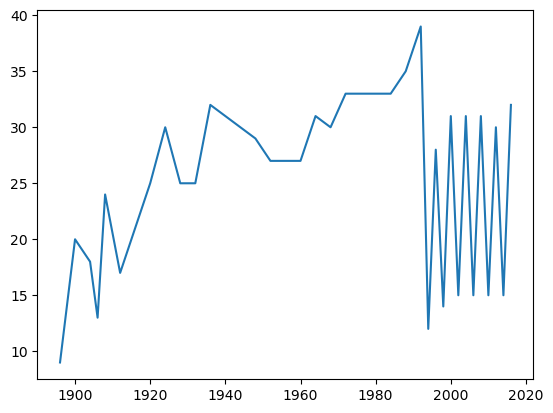

In [12]:
cond_M = GB2_alt[('Sex','')]=='M'
plt.plot(GB2_alt.loc[cond_M,('Year','')] ,GB2_alt.loc[cond_M,('Sport','nunique')])
plt.show()

https://matplotlib.org/stable/api/legend_api.html

exemples sur internet

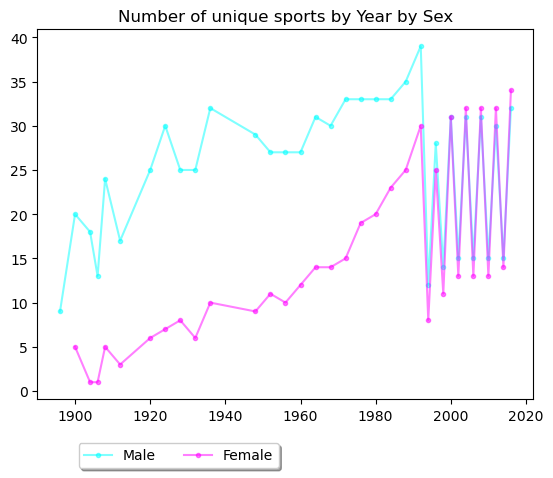

In [13]:
pars = {'marker':'.','alpha':0.5}

plt.title('Number of unique sports by Year by Sex')


plt.plot(GB2H['Year'], GB2H['H_Sp_nunique'] ,label = 'Male',**pars , color = 'cyan')
plt.plot(GB2F['Year'], GB2F['F_Sp_nunique'] ,label = 'Female', **pars, color = 'magenta')


plt.legend(#loc='upper center'
            bbox_to_anchor=(0.5, -0.1)
           ,fancybox=True, shadow=True, ncol=2)
plt.show()

    
3. __Faire un bar-plot qui montre:__<br>
    - le top 10 des noms 
    - qui ont participés à le plus de sports différents, 
    - trié par nombre de sports différents, nombre de médailles
    - changer l'orientation des labels sur l'axe-x ('xticks')
    - changer le nom de l'axe-x: 'top 10' ('xlabel')
    

In [14]:
GB3 = data[['Name'
            ,'Sport'
            ,'Medal']].groupby('Name').agg({'Sport':['nunique','count']
                                            ,'Medal':['count', 'nunique']
                                           })

GB3 = GB3.sort_values(by=[('Sport','nunique') ## trier sur (sport,nunique) ,
                          ,('Medal','count'),] ## puis (si execo) sur (medal, count)
                      ,ascending=False
                     ).head(10)
display(GB3)

Sport       Medal        
                       nunique count count nunique
Name                                              
Wang Nan                     5    11     5       2
Kim Seong-Eun                5     6     0       0
Wolfgang Mller               5    11     0       0
Zhang Li                     5     8     0       0
Wang Hao                     4    11     6       2
Chen Jing                    4    11     5       3
Carl Schuhmann               4    12     4       1
Alexander Viggo Jensen       4    12     3       3
Peter Mller                  4     6     3       2
Kim Yun-Mi                   4     7     2       1

In [15]:
GB2_ = data[['Name','Sport','Medal']].groupby(['Name','Sport']).agg({'Medal':['count','nunique'],'Sport':'count'}).reset_index()
GB2_.sort_values(by=[('Medal','count')], ascending=False, inplace=True)
display(GB2_)



Name       Sport Medal          \
                                                             count nunique   
87965                    Michael Fred Phelps, II    Swimming    28       3   
74150         Larysa Semenivna Latynina (Diriy-)  Gymnastics    18       3   
95032               Nikolay Yefimovich Andrianov  Gymnastics    15       3   
16391                Borys Anfiyanovych Shakhlin  Gymnastics    13       3   
120310                               Takashi Ono  Gymnastics    13       3   
...                                          ...         ...   ...     ...   
7                                      A Dijiang  Basketball     0       0   
6                                        Tin Tun      Boxing     0       0   
5                                    Th Ngn Thng  Gymnastics     0       0   
4                                         Th Anh     Fencing     0       0   
3        Luis ngel Fernando de los Santos Grossi     Cycling     0       0   

       Sport  
       count  
87965     30  
74150     19  
95032     24  
16391     24  
120310    32  
...      ...  
7          1  
6          1  
5          7  
4          1  
3          5  

[136588 rows x 5 columns]

In [16]:
GB2_[GB2_['Name']=='Carl Schuhmann']

Name          Sport Medal         Sport
                                     count nunique count
18163  Carl Schuhmann     Gymnastics     3       1     7
18165  Carl Schuhmann      Wrestling     1       1     1
18162  Carl Schuhmann      Athletics     0       0     3
18164  Carl Schuhmann  Weightlifting     0       0     1

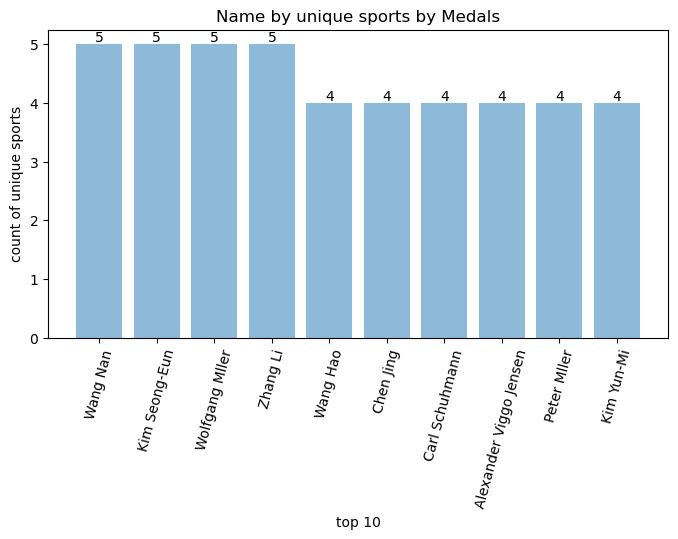

In [17]:
fig,ax = plt.subplots(figsize = (8,4))

plt.title(f'Name by unique sports by Medals')

plt.bar(x=GB3.index,height=GB3[('Sport','nunique')], alpha=0.5)

for c in ax.containers: # ajouter les label de données (la hauteur des barres)
    ax.bar_label(c)

plt.xticks(rotation =75)
plt.xlabel('top 10')
plt.ylabel('count of unique sports')
plt.show()

4. __Faire un pie-plot qui montre les info de 'Carl Schuhmann':__<br>

    - le nombre de médailles (confondues) pour chaque sport
    - avec le type de sport pour lequel cet athlète a le plus de medailles, mis en évidence



SELECT Sport,Medal --,Name  
FROM data  
WHERE Name = 'Carl Schuhmann'  


In [18]:
name = 'Carl Schuhmann' #GB3_.head(1).index[0]

print(name)
data2 = data.loc[data['Name']==name,['Sport','Medal']]
display(data2)

Carl Schuhmann


,Sport,Medal
214346,Gymnastics,Gold
214347,Gymnastics,NaN
214348,Gymnastics,Gold
214349,Weightlifting,NaN
214350,Gymnastics,NaN
214351,Wrestling,Gold
214352,Gymnastics,Gold
214353,Gymnastics,NaN
214354,Gymnastics,NaN
214355,Athletics,NaN


SELECT Sport, COUNT(Medal)   
FROM data  
WHERE Name = 'Carl Schuhmann'  
GROUP BY Sport  


In [19]:

GB4 = (data2.groupby('Sport').count()).sort_values(by='Medal', ascending=False)
GB4 = GB4.loc[GB4.Medal>0,:]

display(GB4)



,Medal
Sport,
Gymnastics,3
Wrestling,1


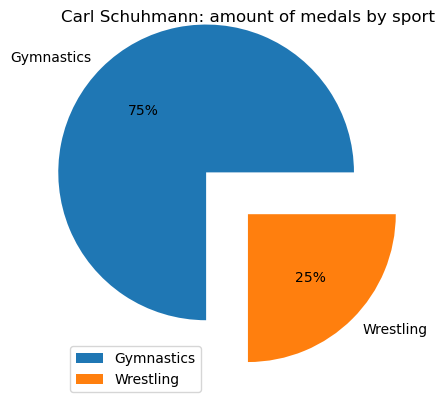

In [20]:
evid = [0,]*GB4.shape[0]
evid[0]= 0.4 #0.2 espacement

plt.title(f'{name}: amount of medals by sport')

plt.pie(labels=GB4.index
        , x= GB4.Medal
        , explode=evid
        , autopct='%1.f%%'
       )
plt.legend(GB4.index)

#plt.tight_layout()
plt.show()


5. __Faire un histogramme qui montre:__<br>
    - l'age
    - par tranche d'age de 3 années


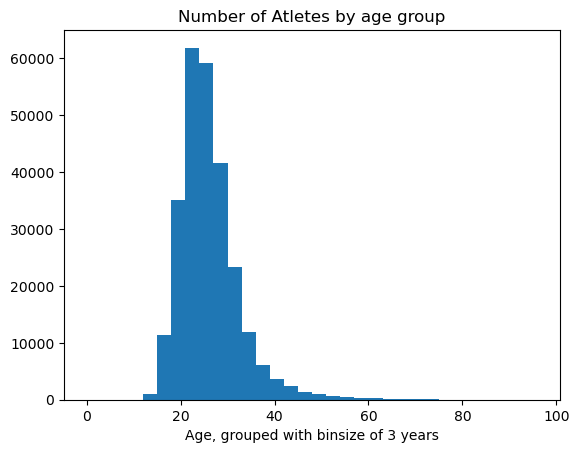

In [21]:
tranche_age= np.arange(0,data['Age'].max()+1,3) #start, stop(exclu), step

plt.title('Number of Atletes by age group')

plt.hist(x=data['Age'], bins=tranche_age) 


plt.xlabel('Age, grouped with binsize of 3 years')
plt.show()

6. __Faire graphique composé d' histogrammes qui montre:__ <br>
    - la taille (height)
    - par tranche de 4 cm
    - decomposé par homme-femme
    - avec un alpha = 0.6

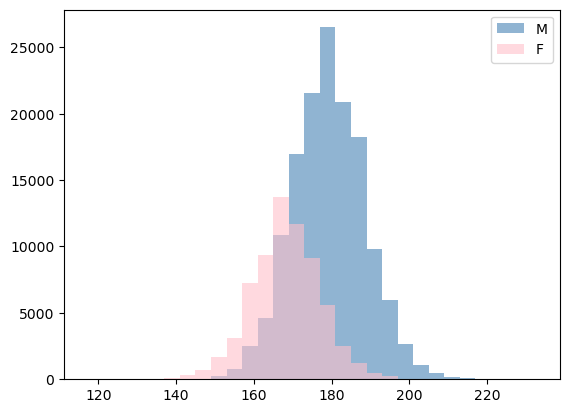

In [26]:

cond_h = data['Sex']=='M'
cond_f = data['Sex']=='F'


lst_conds = [cond_h,cond_f]
lst_colors = ['steelblue','pink']

tranche_taille= np.arange(data['Height'].min()-10,data['Height'].max()+10,4)

for i,cond in enumerate(lst_conds):
    
    plt.hist(x=data.loc[cond,['Height']]
         ,bins=tranche_taille
         ,color = lst_colors[i]
         ,label = data.loc[cond,'Sex'].unique()[0]
         ,alpha = 0.6
        )
#plt.ylim(0,100)
plt.legend()
plt.show()

In [23]:
data.loc[cond,'Sex'].unique()[0]

'F'